# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

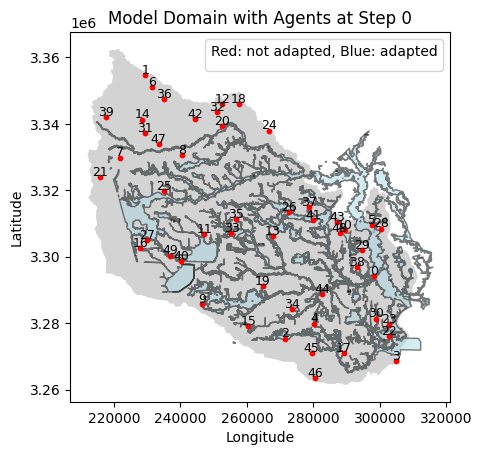

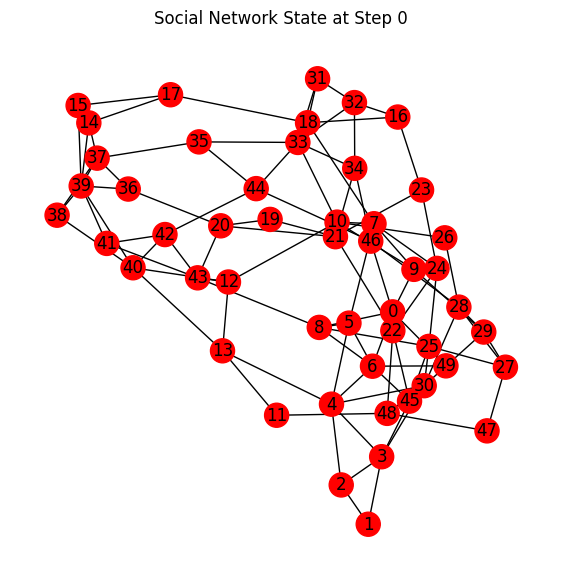

<Figure size 1000x600 with 0 Axes>

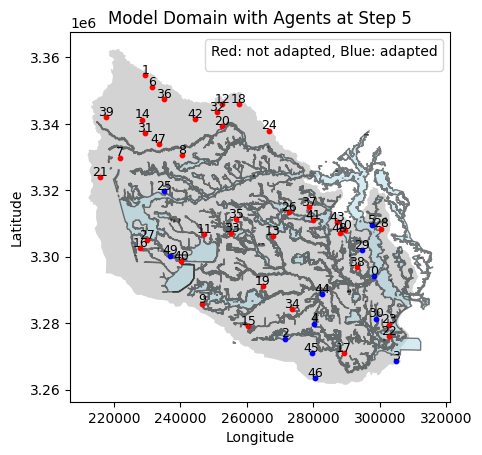

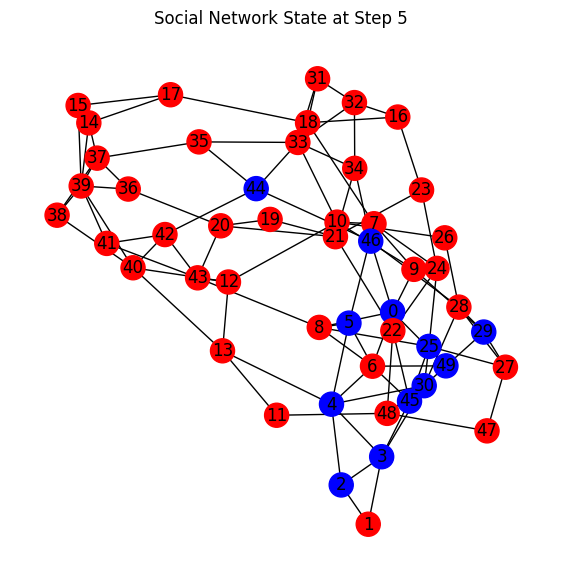

<Figure size 1000x600 with 0 Axes>

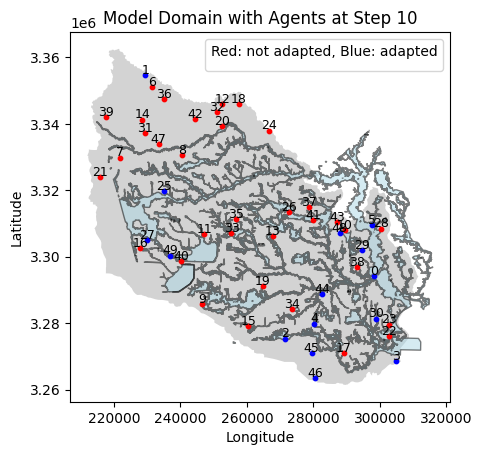

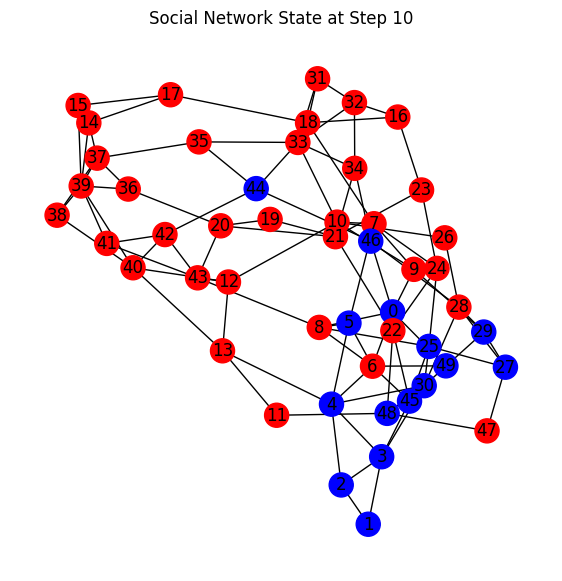

<Figure size 1000x600 with 0 Axes>

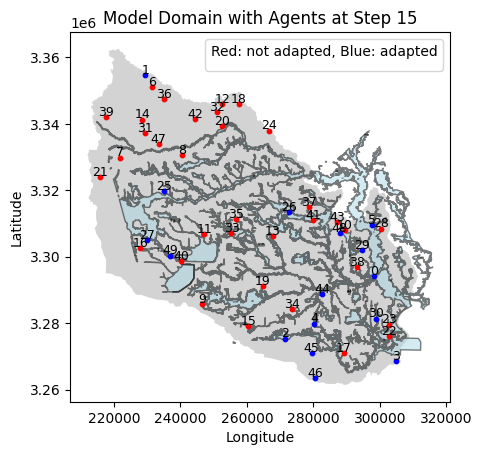

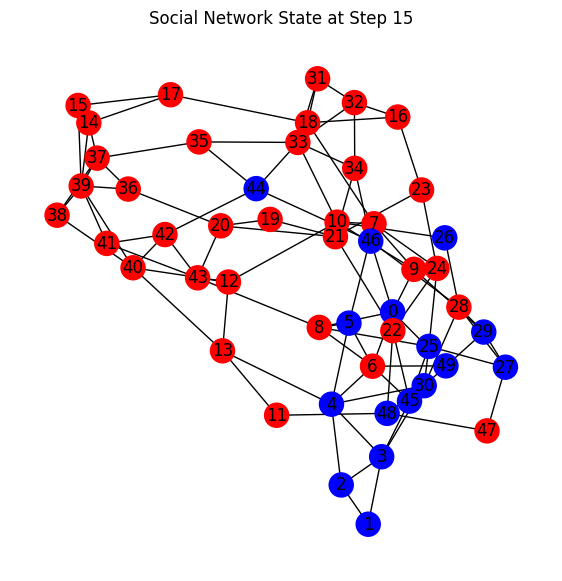

<Figure size 1000x600 with 0 Axes>

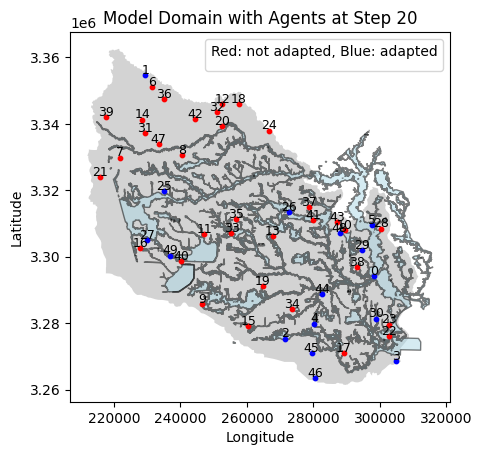

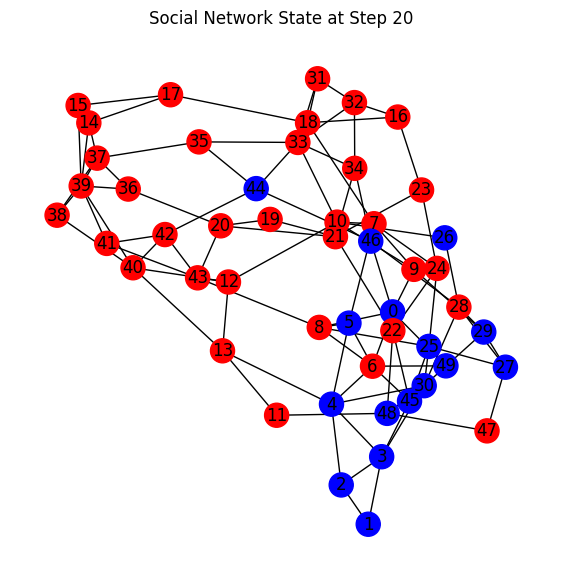

In [1]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 5 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()

The KPI's are: 
FloodDamageEstimated/FloodDamageActual
CostOfAdaptation
Income/IncomeLabel

Eventually, we could reduce the following dataframe even more. However, it is nice to see the full picture of the agents in this matter. Something to discuss. 

In [2]:
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data

FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
0    0                  17.227573         419216.000000          0.000000   
     1                   0.239395          34243.842949          0.000000   
     2                   0.939332         151679.342475          0.000000   
     3                   0.345377          71095.362578          0.000000   
     4                   0.646309          92415.578602          0.000000   
...                           ...                   ...               ...   
19   45                 -0.322427              0.000000         -0.380382   
     46                  0.158010          59367.775817          0.120345   
     47                  0.000000              0.000000          0.000000   
     48                  0.303308          32245.050703          1.044446   
     49                  1.242825          65433.119665          0.689077   

              FloodDamageActual OptimalMeasure  IsAdapted  CostOfAdaptation  \
Step AgentID                                                                  
0    0                 0.000000           None      False                 0   
     1                 0.000000           None      False                 0   
     2                 0.000000           None      False                 0   
     3                 0.000000           None      False                 0   
     4                 0.000000           None      False                 0   
...                         ...            ...        ...               ...   
19   45                0.000000         Drains       True              5400   
     46            50713.652109       Sandbags       True              1155   
     47                0.000000           None      False                 0   
     48            48066.443866         Drains       True              2790   
     49            55614.438330       Sandbags       True               605   

               IncomeLabel  Income   Savings  OwnFloodPerception  \
Step AgentID                                                       
0    0                Rich  115826     0.000                   2   
     1                Poor    5415     0.000                   3   
     2        Middle-Class   30203     0.000                   4   
     3        Middle-Class   35610     0.000                   3   
     4        Middle-Class   44002     0.000                   1   
...                    ...     ...       ...                 ...   
19   45       Middle-Class   28101  1625.250                   3   
     46       Middle-Class   16539    85.425                   1   
     47       Middle-Class   31125     0.000                   3   
     48               Poor    4950   303.750                   3   
     49       Middle-Class   30163   903.150                   3   

              NetworkPerception  
Step AgentID                     
0    0                        0  
     1                        0  
     2                        0  
     3                        0  
     4                        0  
...                         ...  
19   45                       3  
     46                       1  
     47                       3  
     48                       3  
     49                       3  

[1000 rows x 12 columns]

In [12]:
step19 = agent_data.loc[19, :][['FloodDamageEstimated', 'IsAdapted']]
step19

,FloodDamageEstimated,IsAdapted
AgentID,,
0,419216.000000,True
1,0.000000,True
2,94866.477264,True
3,0.000000,True
4,0.000000,True
5,106778.867069,True
6,0.000000,False
7,0.000000,False
8,0.000000,False


If you want to investigate a single agent, change the number behind key= and in the slice to the same number
This will give you the agent you want to investigate
For instance, look at the graph and the blue numbers, pick one out, and investigate how many steps it takes to save up for a measure
Or, to see how the perception changes (barely overtime, but that is the discreet nature of it)

In [3]:
result_df_xs = agent_data.xs(key=23, level='AgentID', axis=0, drop_level=False)

# Using .loc indexer
agent = agent_data.loc[(slice(None), 23), :]

agent

,,FloodDepthEstimated,FloodDamageEstimated,FloodDepthActual,FloodDamageActual,OptimalMeasure,IsAdapted,CostOfAdaptation,IncomeLabel,Income,Savings,OwnFloodPerception,NetworkPerception
Step,AgentID,,,,,,,,,,,,
0,23,1.56369,124776.099814,0.00000,0.000000,None,False,0,Middle-Class,39645,0.0,2,0
1,23,1.56369,124776.099814,0.00000,0.000000,None,False,0,Middle-Class,39645,0.0,1,1
2,23,1.56369,124776.099814,0.00000,0.000000,None,False,0,Middle-Class,39645,0.0,1,1
3,23,1.56369,124776.099814,0.00000,0.000000,None,False,0,Middle-Class,39645,0.0,1,1
4,23,1.56369,124776.099814,0.00000,0.000000,None,False,0,Middle-Class,39645,0.0,1,1
5,23,1.56369,124776.099814,1.04847,112787.206923,None,False,0,Middle-Class,39645,0.0,1,1
6,23,1.56369,124776.099814,1.04847,112787.206923,None,False,0,Middle-Class,39645,0.0,1,1
7,23,1.56369,124776.099814,1.04847,112787.206923,None,False,0,Middle-Class,39645,0.0,1,1
8,23,1.56369,124776.099814,1.04847,112787.206923,None,False,0,Middle-Class,39645,0.0,1,1


In [4]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data

,total_adapted_households
0,0
1,2
2,4
3,8
4,11
5,12
6,12
7,12
8,14
9,15
